In [8]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum

In [9]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [10]:
id_c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(id_c)

0


In [11]:
id_s, id_r, id_w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (id_s,id_r,id_w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 4, mem: 64o}


In [12]:
print(f"{bn.variable(id_s)=}")
print(f"{bn['s']=}")
print(f"{id_s=}")
print(f"{bn.idFromName('s')=}")
print(f"{bn.variable(id_s).name()=}")

bn.variable(id_s)=(pyAgrum.DiscreteVariable@0000028A9C76B2E0) s:Range([0,1])
bn['s']=(pyAgrum.DiscreteVariable@0000028A9C76B2E0) s:Range([0,1])
id_s=1
bn.idFromName('s')=1
bn.variable(id_s).name()='s'


In [13]:
bn.addArc("c","s")

for link in [(id_c,id_r),(id_s,id_w),(id_r,id_w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}


In [14]:
import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet<double>@0000028A9C660320) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [15]:
bn=gum.fastBN("c->r->w<-s<-c")
bn

(pyAgrum.BayesNet<double>@0000028A9C5BD560) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [18]:
bn.cpt(id_c).fillWith([0.4,0.6]) # remember : c=  0


(pyAgrum.Potential<double>@0000028AFBF444B0) 
  c                |
0        |1        |
---------|---------|
 0.4000  | 0.6000  |

In [19]:
bn.cpt("c").fillWith([0.5,0.5])

(pyAgrum.Potential<double>@0000028AFBF444B0) 
  c                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [22]:
bn.cpt("s").names

('s', 'c')

In [24]:
bn.cpt("s")[:]=[ [0.5,0.5],[0.9,0.1]]
print(bn.cpt("s")[1]) # If C=1

[0.9 0.1]


Then P(S|C=0)=[0.5,0.5] and P(S|C=1)=[0.9,0.1]

In [26]:
bn.cpt("s")[0,:]=0.5 # equivalent to [0.5,0.5]
bn.cpt("s")[1,:]=[0.9,0.1]

print(bn.cpt("w").names)
bn.cpt("w")

('w', 'r', 's')


(pyAgrum.Potential<double>@0000028AFBF44930) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.5418  | 0.4582  |
1     |0     || 0.4991  | 0.5009  |
0     |1     || 0.4050  | 0.5950  |
1     |1     || 0.4229  | 0.5771  |

In [27]:
bn.cpt("w")[0,0,:] = [1, 0] # r=0,s=0
bn.cpt("w")[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt("w")[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt("w")[1,1,:] = [0.01, 0.99] # r=1,s=1

In [28]:
# Probably the most convienient way

bn.cpt("w")[{'r': 0, 's': 0}] = [1, 0]
bn.cpt("w")[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt("w")

(pyAgrum.Potential<double>@0000028AFBF44930) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [29]:
bn.cpt("r")[{'c':0}]=[0.8,0.2]
bn.cpt("r")[{'c':1}]=[0.2,0.8]

In [32]:
print(gum.availableBNExts())

bif|dsl|net|bifxml|o3prm|uai|xdsl|pkl


In [35]:
gum.saveBN(bn,"Output/WaterSprinkler.bif")
with open("Output/WaterSprinkler.bif","r") as out:
    print(out.read())

network "unnamedBN" {
// written by aGrUM 1.15.1
}

variable c {
   type discrete[2] {0, 1};
}

variable r {
   type discrete[2] {0, 1};
}

variable w {
   type discrete[2] {0, 1};
}

variable s {
   type discrete[2] {0, 1};
}

probability (c) {
   table 0.5 0.5;
}
probability (r | c) {
   (0) 0.8 0.2;
   (1) 0.2 0.8;
}
probability (w | r, s) {
   (0, 0) 1 0;
   (1, 0) 0.1 0.9;
   (0, 1) 0.1 0.9;
   (1, 1) 0.01 0.99;
}
probability (s | c) {
   (0) 0.5 0.5;
   (1) 0.9 0.1;
}




In [36]:
bn2=gum.loadBN("Output/WaterSprinkler.bif")
gum.saveBN(bn,"Output/WaterSprinkler.net")
with open("Output/WaterSprinkler.net","r") as out:
    print(out.read())
bn3=gum.loadBN("Output/WaterSprinkler.net")


net {
  name = unnamedBN;
  software = "aGrUM 1.15.1";
  node_size = (50 50);
}

node c {
   states = (0 1 );
   label = "c";
   ID = "c";
}

node r {
   states = (0 1 );
   label = "r";
   ID = "r";
}

node w {
   states = (0 1 );
   label = "w";
   ID = "w";
}

node s {
   states = (0 1 );
   label = "s";
   ID = "s";
}

potential (c) {
   data = (  0.5 0.5);
}

potential ( r | c   ) {
   data = 
   ((   0.8   0.2)   % c=0   
   (   0.2   0.8));   % c=1   
}

potential ( w | r   s   ) {
   data = 
   (((   1   0)   % s=0   r=0   
   (   0.1   0.9))   % s=1   r=0   
   ((   0.1   0.9)   % s=0   r=1   
   (   0.01   0.99)));   % s=1   r=1   
}

potential ( s | c   ) {
   data = 
   ((   0.5   0.5)   % c=0   
   (   0.9   0.1));   % c=1   
}





In [37]:
ie=gum.LazyPropagation(bn)

ie.makeInference()
print (ie.posterior("w"))


  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |



In [40]:
from IPython.core.display import HTML
HTML(f"In our BN, $P(W)=${ie.posterior('w')[:]}")

In [41]:
ie.posterior("w")[:]

array([0.3529, 0.6471])

In [42]:
ie.setEvidence({'s':0, 'c': 0})
ie.makeInference()
ie.posterior("w")

(pyAgrum.Potential<double>@0000028A9ECF77B0) 
  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

In [43]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior("w") # using gnb's feature

(pyAgrum.Potential<double>@0000028A9ECF7CF0) 
  w                |
0        |1        |
---------|---------|
 0.3280  | 0.6720  |

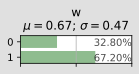

In [44]:
gnb.showProba(ie.posterior("w"))

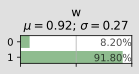

In [45]:
gnb.showPosterior(bn,{'s':1,'c':0},'w')

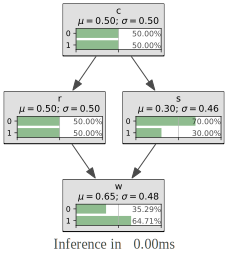

In [46]:
gnb.showInference(bn,evs={})

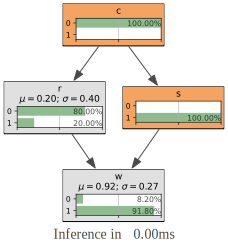

In [47]:
gnb.showInference(bn,evs={'s':1,'c':0})

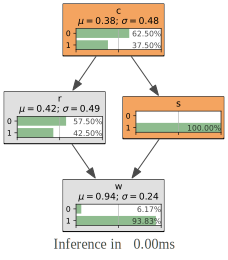

In [48]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

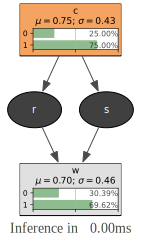

In [49]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})

In [50]:
# fast create a BN (random paramaters are chosen for the CPTs)
bn=gum.fastBN("A->B<-C->D->E<-F<-A;C->G<-H<-I->J")
bn

(pyAgrum.BayesNet<double>@0000028A9C4B0F30) BN{nodes: 10, arcs: 10, domainSize: 1024, dim: 23, mem: 368o}

In [51]:
def testIndep(bn,x,y,knowing):
    res="" if bn.isIndependent(x,y,knowing) else " NOT"
    giv="." if len(knowing)==0 else f" given {knowing}."
    print(f"{x} and {y} are{res} independent{giv}")

testIndep(bn,"A","C",[])
testIndep(bn,"A","C",["E"])
print()
testIndep(bn,"E","C",[])
testIndep(bn,"E","C",["D"])
print()
testIndep(bn,"A","I",[])
testIndep(bn,"A","I",["E"])
testIndep(bn,"A","I",["G"])
testIndep(bn,"A","I",["E","G"])

A and C are independent.
A and C are NOT independent given ['E'].

E and C are NOT independent.
E and C are independent given ['D'].

A and I are independent.
A and I are independent given ['E'].
A and I are independent given ['G'].
A and I are NOT independent given ['E', 'G'].


In [52]:
print(gum.MarkovBlanket(bn,"C").toDot())
gum.MarkovBlanket(bn,"C")

digraph "no_name" {
node [shape = ellipse];
  0[label="A"];
  1[label="B"];
  2[label="C", color=red];
  3[label="D"];
  6[label="G"];
  7[label="H"];

  0 -> 1;
  2 -> 3;
  2 -> 1;
  2 -> 6;
  7 -> 6;

}



<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x0000028AA1E50510> >

In [53]:
gum.MarkovBlanket(bn,"J")

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x0000028AA1E50C90> >

In [54]:
[bn.variable(i).name() for i in bn.minimalCondSet("B",["A","H","J"])]

['A']

In [55]:
[bn.variable(i).name() for i in bn.minimalCondSet("B",["A","G","H","J"])]

['A', 'G', 'H']

In [56]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact("B",["A","C","H","G"]) # H,G will be removed w.r.t the minimalCondSet above

(pyAgrum.Potential<double>@0000028A9EEFC960) 
             ||  B                |
A     |C     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.5384  | 0.4616  |
1     |0     || 0.3479  | 0.6521  |
0     |1     || 0.7664  | 0.2336  |
1     |1     || 0.6430  | 0.3570  |

In [62]:
ie.evidenceImpact("B",["A","G","H","J"]) # "J" is not necessary to compute the impact of the evidence

(pyAgrum.Potential<double>@0000028A9EEFB280) 
                    ||  B                |
G     |H     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.5880  | 0.4120  |
1     |0     |0     || 0.7593  | 0.2407  |
0     |1     |0     || 0.5992  | 0.4008  |
1     |1     |0     || 0.6802  | 0.3198  |
0     |0     |1     || 0.4121  | 0.5879  |
1     |0     |1     || 0.6338  | 0.3662  |
0     |1     |1     || 0.4267  | 0.5733  |
1     |1     |1     || 0.5315  | 0.4685  |

In [63]:
bn=gum.fastBN("Cloudy?->Sprinkler?->Wet Grass?<-Rain?<-Cloudy?")

bn.cpt("Cloudy?").fillWith([0.5,0.5])

bn.cpt("Sprinkler?")[:]=[[0.5,0.5],
                         [0.9,0.1]]

bn.cpt("Rain?")[{'Cloudy?':0}]=[0.8,0.2]
bn.cpt("Rain?")[{'Cloudy?':1}]=[0.2,0.8]

bn.cpt("Wet Grass?")[{'Rain?': 0, 'Sprinkler?': 0}] = [1, 0]
bn.cpt("Wet Grass?")[{'Rain?': 0, 'Sprinkler?': 1}] = [0.1, 0.9]
bn.cpt("Wet Grass?")[{'Rain?': 1, 'Sprinkler?': 0}] = [0.1, 0.9]
bn.cpt("Wet Grass?")[{'Rain?': 1, 'Sprinkler?': 1}] = [0.01, 0.99]

# the next line control the number of visible digits
gum.config['notebook','potential_visible_digits']=2
gnb.sideBySide(bn.cpt("Cloudy?"),captions=['$P(Cloudy)$'])
gnb.sideBySide(bn.cpt("Sprinkler?"),gnb.getBN(bn,size="3!"),bn.cpt("Rain?"),
              captions=['$P(Sprinkler|Cloudy)$',"",'$P(WetGrass|Sprinkler,Rain)$'])
gnb.sideBySide(bn.cpt("Wet Grass?"),captions=['$P(WetGrass|Sprinkler,Rain)$'])

In [64]:
bn=gum.fastBN("Cloudy?->Sprinkler?->Wet Grass?<-Rain?<-Cloudy?")

bn.cpt("Cloudy?").fillWith([0.5,0.5])

bn.cpt("Sprinkler?")[:]=[[0.5,0.5],
                         [0.9,0.1]]

bn.cpt("Rain?")[{'Cloudy?':0}]=[0.8,0.2]
bn.cpt("Rain?")[{'Cloudy?':1}]=[0.2,0.8]

bn.cpt("Wet Grass?")[{'Rain?': 0, 'Sprinkler?': 0}] = [1, 0]
bn.cpt("Wet Grass?")[{'Rain?': 0, 'Sprinkler?': 1}] = [0.1, 0.9]
bn.cpt("Wet Grass?")[{'Rain?': 1, 'Sprinkler?': 0}] = [0.1, 0.9]
bn.cpt("Wet Grass?")[{'Rain?': 1, 'Sprinkler?': 1}] = [0.01, 0.99]

# the next lines control the visualisation of proba as fraction
gum.config['notebook','potential_with_fraction']=True
gum.config['notebook', 'potential_fraction_with_latex']=True
gum.config['notebook', 'potential_fraction_limit']=100

gnb.sideBySide(bn.cpt("Cloudy?"),captions=['$P(Cloudy)$'])
gnb.sideBySide(bn.cpt("Sprinkler?"),gnb.getBN(bn,size="3!"),bn.cpt("Rain?"),
              captions=['$P(Sprinkler|Cloudy)$',"",'$P(WetGrass|Sprinkler,Rain)$'])
gnb.sideBySide(bn.cpt("Wet Grass?"),captions=['$P(WetGrass|Sprinkler,Rain)$'])